

# LU Decomposition
$\newcommand{\AAA}{\mathbf{A}}$
$\newcommand{\BBB}{\mathbf{B}}$
$\newcommand{\XXX}{\mathbf{X}}$
$\newcommand{\UUU}{\mathbf{U}}$
$\newcommand{\YYY}{\mathbf{Y}}$
$\newcommand{\LLL}{\mathbf{L}}$

If a matrix $\mathbf{A}$ can be written as the product
of an upper tringular matrix, $\mathbf{L}$, and a lower
triangular matrix $\mathbf{U} $ the corresponding equation system

\begin{eqnarray}
\mathbf{A}\mathbf{X} = \mathbf{B}
\end{eqnarray}

can be solved by reducing to two (simpler) systems.

First substitute 
\begin{eqnarray}
  \mathbf{A}=\mathbf{LU}
\end{eqnarray}  
to get
\begin{eqnarray}
  \mathbf{L}\mathbf{U}\mathbf{X} =\mathbf{B}.
\end{eqnarray}
Then introduce 
\begin{eqnarray}
  \mathbf{Y} = \mathbf{U}\mathbf{X} 
\end{eqnarray}
to get
\begin{eqnarray}
  \mathbf{L}\mathbf{Y}=\mathbf{B}.
\end{eqnarray}
First solve for $\mathbf{Y}$ 
\begin{eqnarray}
\mathbf{L}\mathbf{Y} = \mathbf{B}
\end{eqnarray}
then solve for $\mathbf{X}$
\begin{eqnarray}
\UUU\XXX = \YYY
\end{eqnarray}

## Gauss Elimination
$\newcommand{\AAA}{\mathbf{A}}$
$\newcommand{\BBB}{\mathbf{B}}$
$\newcommand{\XXX}{\mathbf{X}}$

A linear system of equations is written as:
\begin{eqnarray}
    \begin{matrix}
    a_{1,1}x_1 & + &  a_{1,2}x_2 & + &\cdots & +a_{1,n}x_n & = & b_1 \\
    a_{2,1}x_1 & + &  a_{2,2}x_2 & + &\cdots & +a_{2,n}x_n & = & b_2 \\
    \vdots     &   &  \vdots     & \ddots & \vdots  \\
    a_{n,1}x_1 & + &  a_{n,2}x_2 & + &\cdots & +a_{n,n}x_n & = & b_n \\
    \end{matrix}
\end{eqnarray}
as a matrix equation
\begin{eqnarray}
 \AAA\XXX = \BBB
\end{eqnarray}
where
\begin{eqnarray}
 \AAA = 
    \begin{pmatrix}
    a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
    a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    a_{n,1} & a_{n,2} & \cdots & a_{n,n} 
    \end{pmatrix}
\end{eqnarray}
and
\begin{eqnarray}
    \XXX =
    \begin{pmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_n
    \end{pmatrix},
    \,\,\,
    \BBB =
    \begin{pmatrix}
    b_1 \\
    b_2 \\
    \vdots \\
    b_n
    \end{pmatrix}
\end{eqnarray}

### Example 

The equation system
\begin{eqnarray}
\begin{matrix}
    A & + &  B  & + & C  & = & 1  \\
      &   &  B  & + & 3C & = & -2 \\
      &   &  2B & + & 8C & = & 0  \\ 
\end{matrix}
\end{eqnarray}

\begin{eqnarray}
  \AAA \XXX = \BBB
\end{eqnarray}
where
\begin{eqnarray}
\AAA=
\begin{pmatrix}
    1 &  1  &  1  \\
    0 &  1  &  3  \\
    0 &  2  &  8  \\ 
\end{pmatrix},
\,\,\,
\XXX = 
\begin{pmatrix}
A  \\
B \\
C  \\
\end{pmatrix},
\,\,\,
\BBB = 
\begin{pmatrix}
1  \\
-2 \\
0  \\
\end{pmatrix}
\end{eqnarray}

Applying these operations to a linear system of equations
does not change it's solution

1. **Interchange**: Order of equations changed
2. **Scaling**:     Multiplication with a scalar
3. **Replacment**:  Equation replaced with the sum of itself and a multiple of any other equation

### Example
\begin{eqnarray}
\begin{matrix}
    A & + &  B  & + & C  & = & 1  \\
    A & + &  2B & + & 4C & = & -1 \\
    A & + &  3B & + & 9C & = & 1  \\ 
\end{matrix}
\end{eqnarray}

Replace second equation with: second equation - first equation

\begin{eqnarray}
\begin{matrix}
    A & + &  B  & + & C  & = & 1  \\
      &   &  B  & + & 3C & = & -2 \\
    A & + &  3B & + & 9C & = & 1  \\ 
\end{matrix}
\end{eqnarray}

Replace third equation with: third equation - first equation

\begin{eqnarray}
\begin{matrix}
    A & + &  B  & + & C  & = & 1  \\
      &   &  B  & + & 3C & = & -2 \\
      &   &  2B & + & 8C & = & 0  \\ 
\end{matrix}
\end{eqnarray}

Replace third equation with third equation - 2 $\times$ second equation
\begin{eqnarray}
\begin{matrix}
    A & + &  B  & + & C  & = & 1  \\
      &   &  B  & + & 3C & = & -2 \\
      &   &     &   & 2C & = & 4  
\end{matrix}
\end{eqnarray}

Upper triangular system which can be solved by **backsubstitution**.

###  Backsubstituion

\begin{eqnarray}
\begin{matrix}
    A & + &  B  & + & C  & = & 1  \\
      &   &  B  & + & 3C & = & -2 \\
      &   &     &   & 2C & = & 4  
\end{matrix}
\end{eqnarray}
Divide the third equation by 2 to obtain C:
\begin{eqnarray}
\begin{matrix}
    A & + &  B  & + & C  & = & 1  \\
      &   &  B  & + & 3C & = & -2 \\
      &   &     &   & C  & = & 2  
\end{matrix}
\end{eqnarray}
Insert the value for $C$ in the second equation and solve for B
\begin{eqnarray}
\begin{matrix}
    A & + &  B  & + & C     & = & 1  \\
      &   &  B  &   &       & = &  -8 \\
      &   &     &   & C     & = & 2  
\end{matrix}
\end{eqnarray}
Insert value for $C$ and $B$ in the first equation and solve for A
\begin{eqnarray}
\begin{matrix}
    A &   &     &   &    & = & 7  \\
      &   &  B  &   &    & = & -8 \\
      &   &     &   & C  & = & 2  
\end{matrix}
\end{eqnarray}

### Augumented matrix
It is practical to define an \textbf{augumented} matrix
by inserting the right-hand vector $\BBB$ as an extra (augumented)
column in $\AAA$
\begin{eqnarray}
[\AAA | \BBB]
\end{eqnarray}
\begin{eqnarray}
 \AAA = 
    \left(
    \begin{matrix}
    a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
    a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    a_{n,1} & a_{n,2} & \cdots & a_{n,n} 
    \end{matrix}
    \,\,\,
    \left| 
    \begin{matrix}
     b_1 \\
     b_2 \\
     \vdots \\
     b_n
    \end{matrix}
    \right.
    \right)
\end{eqnarray}

### Example

Find the solution of the equation system
\begin{eqnarray}
\begin{matrix}
    x_1 & + & 2x_2 + & x_3 + & 4x_4 & = & 13 \\
   2x_1 & + & 0x_2 + & 4x_3 + & 3x_4 & = & 28 \\
    4x_1 & + & 2x_2 + & 2x_3 + & x_4 & = & 20 \\
    -3x_1 & + & x_2 + & 3x_3 + & 2x_4 & = & 6 \\
\end{matrix}    
\end{eqnarray}

Augumented matrix
\begin{eqnarray}
\begin{matrix}
\rightarrow \mbox{pivot} \\
m_{21} = 2               \\
m_{31} = 4               \\
m_{41} = -3              \\
\end{matrix}
\left[
\begin{matrix}
    1 & 2 & 1 & 4  \\
    2 & 0 & 4 & 3  \\
    4 & 2 & 2 & 1  \\
   -3 & 1 & 3 & 2  \\
\end{matrix}    
\,\,\,
\left| 
\begin{matrix}
13 \\
28 \\
20 \\
6  \\
\end{matrix}
\right.
\right]
\end{eqnarray}

The first row is called the **pivotal** row, and $a_{11}=1$ the **pivot** element.
The multipliers $m_{21}, m_{31}$ and $m_{41}$ are used for multiplying row 1 and
subtracting from rows 2-4.
This will eliminate all matrix elements below the pivot element.

\begin{eqnarray}
\begin{matrix}
\rightarrow \mbox{pivot} \\
m_{21} = 2               \\
m_{31} = 4               \\
m_{41} = -3              \\
\end{matrix}
\left[
\begin{matrix}
    1 & 2 & 1 & 4  \\
    2 & 0 & 4 & 3  \\
    4 & 2 & 2 & 1  \\
   -3 & 1 & 3 & 2  \\
\end{matrix}    
\,\,\,
\left| 
\begin{matrix}
13 \\
28 \\
20 \\
6  \\
\end{matrix}
\right.
\right]
\end{eqnarray}

After elimination
\begin{eqnarray}
\begin{matrix}
\rightarrow \mbox{pivot} \\
m_{21} = 2               \\
m_{31} = 4               \\
m_{41} = -3              \\
\end{matrix}
\left[
\begin{matrix}
    1 & 2 & 1 & 4        \\
    0 & -4 & 2 & -5      \\
    0 & -6 & -2 & -15    \\
    0 & 7 & 6 & 14        \\
\end{matrix}    
\,\,\,
\left| 
\begin{matrix}
13  \\
2   \\
-32 \\
45  \\
\end{matrix}
\right.
\right]
\end{eqnarray}

\begin{eqnarray}
\begin{matrix}
\,                       \\
\rightarrow \mbox{pivot} \\
m_{31} = 6/4            \\
m_{41} = -7/4             \\
\end{matrix}
\left[
\begin{matrix}
    1 & 2 & 1 & 4        \\
    0 & -4 & 2 & -5      \\
    0 & -6 & -2 & -15    \\
    0 & 7 & 6 & 14        \\
\end{matrix}    
\,\,\,
\left| 
\begin{matrix}
13  \\
2   \\
-32 \\
45  \\
\end{matrix}
\right.
\right]
\end{eqnarray}

After elimination
\begin{eqnarray}
\begin{matrix}
\,                       \\
\rightarrow \mbox{pivot} \\
m_{31} = 6/4            \\
m_{41} = -7/4             \\
\end{matrix}
\left[
\begin{matrix}
    1 & 2 & 1 & 4        \\
    0 & -4 & 2 & -5      \\
    0 & 0  & -5  & -7.5    \\
    0 & 0 & 9.5 & 5.25        \\
\end{matrix}    
\,\,\,
\left| 
\begin{matrix}
13  \\
2   \\
-35 \\
48.5  \\
\end{matrix}
\right.
\right]
\end{eqnarray}

\begin{eqnarray}
\begin{matrix}
\,                       \\
\,            \\
\rightarrow \mbox{pivot} \\
m_{41} = -9.5/5             \\
\end{matrix}
\left[
\begin{matrix}
    1 & 2 & 1 & 4        \\
    0 & -4 & 2 & -5      \\
    0 & 0  & -5  & -7.5    \\
    0 & 0 & 9.5 & 5.25        \\
\end{matrix}    
\,\,\,
\left| 
\begin{matrix}
13  \\
2   \\
-35 \\
48.5  \\
\end{matrix}
\right.
\right]
\end{eqnarray}

After elimination
\begin{eqnarray}
\begin{matrix}
\,                       \\
\,            \\
\rightarrow \mbox{pivot} \\
m_{41} = -9.5/5             \\
\end{matrix}
\left[
\begin{matrix}
    1 & 2 & 1 & 4        \\
    0 & -4 & 2 & -5      \\
    0 & 0  & -5  & -7.5    \\
    0 & 0 &  & -9.0        \\
\end{matrix}    
\,\,\,
\left| 
\begin{matrix}
13  \\
2   \\
-35 \\
-18\\
\end{matrix}
\right.
\right]
\end{eqnarray}

Back substitution gives the solution: $x_4 = 2, x_3=4, x_2 = -1, x_1 =3$.

## Gaussian Elimination algorithm


Augumented matrix size $N\times N+1$ with $\BBB$ stored in
column $N+1$.

\begin{eqnarray}
\AAA\XXX =
    \begin{bmatrix}
    a^{(1)}_{1,1} & a^{(1)}_{1,2} & \cdots & a^{(1)}_{1,N} \\
    a^{(1)}_{2,1} & a^{(1)}_{2,2} & \cdots & a^{(1)}_{2,N} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    a^{(1)}_{N,1} & a^{(1)}_{N,2} & \cdots & a^{(1)}_{N,N} 
    \end{bmatrix}
    \begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_N
    \end{bmatrix}
    =
    \begin{bmatrix}
    a^{(1)}_{1,N+1} \\
    a^{(1)}_{2,N+1} \\
    \vdots \\
    a^{(1)}_{N,N+1}
    \end{bmatrix}
    = \BBB
\end{eqnarray}

Construct an upper triangular system
\begin{eqnarray}
\UUU\XXX =
    \begin{bmatrix}
    a^{(1)}_{1,1} & a^{(1)}_{1,2} & a^{(1)}_{1,3} &\cdots & a^{(1)}_{1,N} \\
    0             & a^{(1)}_{2,2} & a^{(1)}_{2,3} &\cdots & a^{(1)}_{2,N} \\
    0             & 0             & a^{(1)}_{3,3} &\cdots & a^{(1)}_{3,N} \\
    \vdots        & \vdots        & \ddots        & \vdots& \vdots        \\
    0             & 0             & 0             &\cdots & a^{(1)}_{N,N} \\ 
    \end{bmatrix}
    \begin{bmatrix}
    x_1 \\
    x_2 \\
    \vdots \\
    x_N
    \end{bmatrix}
    =
    \begin{bmatrix}
    a^{(1)}_{1,N+1} \\
    a^{(1)}_{2,N+1} \\
    \vdots \\
    a^{(1)}_{N,N+1}
    \end{bmatrix}
    = \YYY
\end{eqnarray}

**Step one**: Create augumnted matrix and store coefficients
\begin{eqnarray}
    \left[
    \begin{matrix}
    a^{(1)}_{1,1} & a^{(1)}_{1,2} & a^{(1)}_{1,3}  &\cdots & a^{(1)}_{1,N} \\
    a^{(1)}_{2,1} & a^{(1)}_{2,2} & a^{(1)}_{2,3}  &\cdots & a^{(1)}_{2,N} \\
    \vdots        & \vdots        & \ddots         &\vdots & \vdots        \\
    a^{(1)}_{N,1} & a^{(1)}_{N,2} & a^{(1)}_{N,3}  &\cdots & a^{(1)}_{N,N} 
    \end{matrix}
    \right.
    \left.
    \left|
    \begin{matrix}
    a^{(1)}_{1,N+1} \\
    a^{(1)}_{2,N+1} \\
    \vdots \\
    a^{(1)}_{N,N+1}
    \end{matrix}
    \right.
    \right]
\end{eqnarray}
The superscript $a^{(1)}_{rc}$ means that the coefficients are stored
for the first time in row $r$ and column $c$.

\begin{eqnarray}
    \left[
    \begin{matrix}
    a^{(1)}_{1,1} & a^{(1)}_{1,2} & a^{(1)}_{1,3}  &\cdots & a^{(1)}_{1,N} \\
    a^{(1)}_{2,1} & a^{(1)}_{2,2} & a^{(1)}_{2,3}  &\cdots & a^{(1)}_{2,N} \\
    \vdots        & \vdots        & \ddots         &\vdots & \vdots        \\
    a^{(1)}_{N,1} & a^{(1)}_{N,2} & a^{(1)}_{N,3}  &\cdots & a^{(1)}_{N,N} 
    \end{matrix}
    \right.
    \left.
    \left|
    \begin{matrix}
    a^{(1)}_{1,N+1} \\
    a^{(1)}_{2,N+1} \\
    \vdots \\
    a^{(1)}_{N,N+1}
    \end{matrix}
    \right.
    \right]
\end{eqnarray}

**Step two**: If $a_{11}=0$, switch rows. Then eliminate
the elements below the pivot element.

- for r=2:N 
    - $m_{r1} = a^{(1)}_{r1}/a^{(1)}_{11}$, $a^{(2)}_{r1} = 0$               
        - for c=2:N+1        
           $a^{(2)}_{rc} = a^{(1)}_{rc}-m_{r1}*a^{(1)}_{1c}$
         


Result after step two:
\begin{eqnarray}
    \left[
    \begin{matrix}
    a^{(1)}_{1,1} & a^{(1)}_{1,2} & a^{(1)}_{1,3}  &\cdots & a^{(1)}_{1,N} \\
    0             & a^{(2)}_{2,2} & a^{(2)}_{2,3}  &\cdots & a^{(2)}_{2,N} \\
    \vdots        & \vdots        & \ddots         &\vdots & \vdots        \\
    0             & a^{(2)}_{N,2} & a^{(2)}_{N,3}  &\cdots & a^{(2)}_{N,N} 
    \end{matrix}
    \right.
    \left.
    \left|
    \begin{matrix}
    a^{(1)}_{1,N+1} \\
    a^{(2)}_{2,N+1} \\
    \vdots \\
    a^{(2)}_{N,N+1}
    \end{matrix}
    \right.
    \right]
\end{eqnarray}

**Step three**: if $a_{22}=0$ switch rows with one below, then eliminate elements in
        the column below the new pivot $a_{22}$
        
- for r=3:N 
    - $m_{r2} = a^{(2)}_{r2}/a^{(2)}_{22}$, $a^{(3)}_{r2} = 0$                    
        - for c=3:N+1
           $a^{(3)}_{rc} = a^{(2)}_{rc}-m_{r2}*a^{(2)}_{2c}$             

Result after step three:
\begin{eqnarray}
    \left[
    \begin{matrix}
    a^{(1)}_{1,1} & a^{(1)}_{1,2} & a^{(1)}_{1,3}  &\cdots & a^{(1)}_{1,N} \\
    0             & a^{(2)}_{2,2} & a^{(2)}_{2,3}  &\cdots & a^{(2)}_{2,N} \\
    \vdots        & \vdots        & \ddots         &\vdots & \vdots        \\
    0             & 0             & a^{(3)}_{N,3}  &\cdots & a^{(3)}_{N,N} 
    \end{matrix}
    \right.
    \left.
    \left|
    \begin{matrix}
    a^{(1)}_{1,N+1} \\
    a^{(2)}_{2,N+1} \\
    \vdots \\
    a^{(3)}_{N,N+1}
    \end{matrix}
    \right.
    \right]
\end{eqnarray}

**General step p+1**: if $a_{pp}=0$ switch rows with one below, then eliminate elements in
        the column below the new pivot $a_{pp}$.
        
- for r=p+1:N 
    - $m_{rp} = a^{(p)}_{rp}/a^{(p)}_{pp}$, $a^{(p+1)}_{rp} = 0$
        - for c=p+1:N+1 
            - $a^{(p+1)}_{rc} = a^{(p)}_{rc}-m_{rp}*a^{(p)}_{pc}$
         
Final result
\begin{eqnarray}
    \left[
    \begin{matrix}
    a^{(1)}_{1,1} & a^{(1)}_{1,2} & a^{(1)}_{1,3}  &\cdots & a^{(1)}_{1,N} \\
    0             & a^{(2)}_{2,2} & a^{(2)}_{2,3}  &\cdots & a^{(1)}_{2,N} \\
    \vdots        & \vdots        & \ddots         &\vdots & \vdots        \\
    0             & 0             & 0              &\cdots & a^{(N)}_{N,N} 
    \end{matrix}
    \right.
    \left.
    \left|
    \begin{matrix}
    a^{(1)}_{1,N+1} \\
    a^{(2)}_{2,N+1} \\
    \vdots \\
    a^{(N)}_{N,N+1}
    \end{matrix}
    \right.
    \right]
\end{eqnarray}

This system has the form
\begin{eqnarray}
\UUU\XXX = \YYY
\end{eqnarray}
and can be solved by backsubstitution.

## LU Decomposition example

The matrix $\AAA=\LLL\UUU$ can be decomposed using the Gaussian elimination
multipliers:

 \begin{eqnarray}
 \begin{bmatrix}
 a_{11} & a_{12} & a_{13} & a_{14} \\ 
 a_{21} & a_{22} & a_{23} & a_{24} \\ 
 a_{31} & a_{32} & a_{33} & a_{34} \\ 
 a_{41} & a_{42} & a_{43} & a_{44} \\
 \end{bmatrix}
=
\begin{bmatrix}
1      & 0      & 0      & 0      \\ 
m_{21} & 1      & 0      & 0      \\ 
m_{31} & a_{32} & 1      & 0      \\ 
m_{41} & m_{42} & m_{43} & 1      \\ 
\end{bmatrix}
\begin{bmatrix}
u_{11} & u_{12} & u_{13} & u_{14} \\ 
0      & u_{22} & u_{23} & u_{24} \\ 
0      & 0      & u_{33} & u_{34} \\ 
0      & 0      & 0      & u_{44} \\ 
\end{bmatrix}
\end{eqnarray}

In equation form
first solve the equation system $\LLL\YYY=\BBB$ for $\YYY$:
\begin{eqnarray}
\begin{matrix}
y_1        &   &            &     &           &          &     & = &b_1 \\
m_{21}y_1  & + & y_2        &     &           &          &     & = &b_2 \\
m_{31}y_1  & + & m_{32}y_2  & +   & y_3       &          &     & = &b_3 \\
m_{41}y_1  & + & m_{42}y_2  & +   & m_{43}y_3 & +        & y_4 & = & b_4
\end{matrix}
\end{eqnarray}
Then solve $\UUU\XXX=\YYY$ for $\XXX$.
\begin{eqnarray}
\begin{matrix}
u_{11}x_1  & + & u_{12}x_2  & + & u_{13}x_3 &+ & u_{14}x_4  & = &y_1 \\
           &   & u_{22}x_2  & + & u_{23}x_3 &+ & u_{24}x_4  & = &y_2 \\
           &   &            &   & u_{33}x_3 &+ & u_{34}x_4  & = &y_3 \\
           &   &            &   &           &  & u_{44}x_4  & = &y_4 
\end{matrix}
\end{eqnarray}

## Example

\begin{eqnarray}
\AAA =
\begin{bmatrix}
4  & 3 & -1 \\
-2 & -4 & 5  \\
1  & 2  & 6 
\end{bmatrix}
\end{eqnarray}

Construct LU deomposition by Gaussian elimination and
saving multipliers

\begin{eqnarray}
\AAA = 
\begin{bmatrix}
1  &  0  & 0 \\
0  &  1  & 0 \\
0  &  0  & 1 
\end{bmatrix}
\begin{bmatrix}
4  & 3 & -1 \\
-2 & -4 & 5  \\
1  & 2  & 6 
\end{bmatrix}
\end{eqnarray}

\begin{eqnarray}
\AAA = 
\begin{bmatrix}
1  &  0  & 0 \\
-0.5  &  1  & 0 \\
0.25  &  0  & 1 
\end{bmatrix}
\begin{bmatrix}
4  & 3 & -1 \\
0 & -2.5 & 4.5  \\
0  & 1.25  & 6.25 
\end{bmatrix}
\end{eqnarray}

\begin{eqnarray}
\AAA = 
\begin{bmatrix}
1  &  0  & 0 \\
-0.5  &  1  & 0 \\
0.25  &  0  & 1 
\end{bmatrix}
\begin{bmatrix}
4  & 3 & -1 \\
0 & -2.5 & 4.5  \\
0  & 1.25  & 6.25 
\end{bmatrix}
\end{eqnarray}

\begin{eqnarray}
\AAA = 
\begin{bmatrix}
1  &  0  & 0 \\
-0.5  &  1  & 0 \\
0.25  &  -0.5  & 1 
\end{bmatrix}
\begin{bmatrix}
4  & 3 & -1 \\
0 & -2.5 & 4.5  \\
0  & 0  & 8.5 
\end{bmatrix}
\end{eqnarray}

# Python libraries 

Python have several libraries which can be used for solving linear equations. The numpy routine lin.solve gives an exact solution using LU decomposition. The scipy.linalg.lu routine performs LU decomposition and can be used
in conjunction with scipy.linalg.solve_triangular to solve a linear equation system.
The conjugate gradient solver scipy.linalg.cg can also be used to solve a linear equation system.
We will use all of these routines and compare the performance in terms of accuracy and compute time.

## Test case

For testing the Python solvers we will use the the finite-difference solution of the two-dimensional
laplace equation given by:

\begin{eqnarray}
\frac{partial f(x,y)}{\partial x} + \frac{\partial f(x,y)}{\partial y} = 0,
\end{eqnarray}
where $f(x,y)$ is the function we want to solve for and $x,y$ are corrdinates.

The Laplace equation is discretized on a 2D grid using $x=i\Delta x$ and $j=\Delta x$, 
where $\Delta x$ is the size of each grid cell and $i,j$ are integers ranging from $0$ to $N$.
Assuming the phyiscal length of the grid in the $x$ and $y$-directions, then $N=L/\delta x +1$.
The finite-difference equations can be derived as for the one-dimensional case.
We denote $f_{i,j} = f(x,y)$ and obtain the following equations for the
interior points of the grid:

\begin{eqnarray}
f_{i+1,j} -2f_{i,j} + f_{i-1,j} +f_{i,j+1} -2f_{i,j} + f_{i,j-1} = 0.
\end{eqnarray}
Here $i,j$ range from 1 to $N-2$.
The boundary conditions are inserted around the edge of the grid 
and are zero, except for the top boundary.

The finte-difference equation above can be reorganized as a matrix equation of the type
\begin{eqnarray}
\AAA\mathbf{x} = \mathbf{b}.
\end{eqnarray}

The matrix $A$ is a square matrix :

\begin{eqnarray}
 \AAA = 
    \begin{pmatrix}
    a_{1,1} & a_{1,2} & \cdots & a_{1,n} \\
    a_{2,1} & a_{2,2} & \cdots & a_{2,n} \\
    \vdots  & \vdots  & \ddots & \vdots  \\
    a_{n,1} & a_{n,2} & \cdots & a_{n,n} 
    \end{pmatrix}
\end{eqnarray}


where each element is also a matrix of the type:
$$\mathbf{a} = 
\begin{bmatrix}
-2&1&0&0&\cdots&0&0&0 \\
1&-2&1&0&\cdots&0&0&0 \\
0&1&-2&1&\cdots&0&0&0 \\
\vdots&\vdots&\vdots&\vdots& & \vdots&\vdots&\vdots \\
0&0&0&0&\cdots&1&-2&1 \\
0&0&0&0&\cdots&0&1&-2 
\end{bmatrix}$$

The size of the $\mathbf{a}$ matrix is $N \times N$, so the
size of the $A$ matrix is then $N^2 \times N^2$.
The unknown funxtions $f_{ij}$ are contained in the $\mathbf{x}$ vector, while
the boundary conditions are stored in the right-hand side $\mathbf{b}$ vector.

The python code below implements the solution of the above equation using three different solvers:

- numpy.linalg.solve
- scipy.linalg.lu
- scipy.linalg.cg

We compare performance in terms of accuracy and compute time by the python code given below.

In [ ]:
%%javascript
MathJax.Hub.Config({
    TeX: { equationNumbers: { autoNumber: "AMS" } }
});


nx :  10
cg...
gesv...
lu...
nx :  20
cg...
gesv...
lu...
nx :  30
cg...
gesv...
lu...
nx :  40
cg...
gesv...
lu...
nx :  50
cg...
gesv...
lu...
nx :  60
cg...
gesv...
lu...
nx :  70
cg...
gesv...
lu...
nx :  80
cg...
gesv...
lu...
nx :  90
cg...
gesv...
lu...
nx :  100
cg...
gesv...
lu...
nx :  110
cg...
gesv...
lu...
nx :  120
cg...
gesv...
lu...
nx :  130
cg...
gesv...
lu...
nx :  140
cg...
gesv...
lu...
nx :  150
cg...
gesv...
lu...


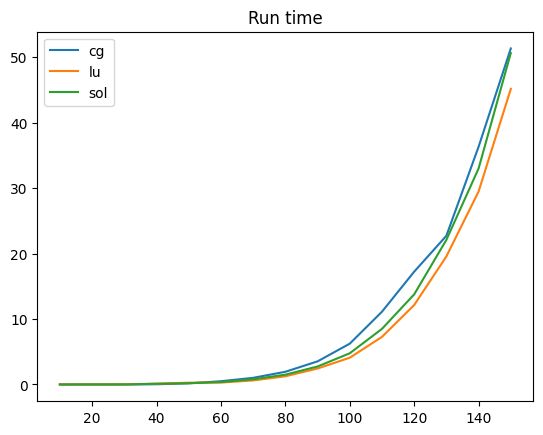

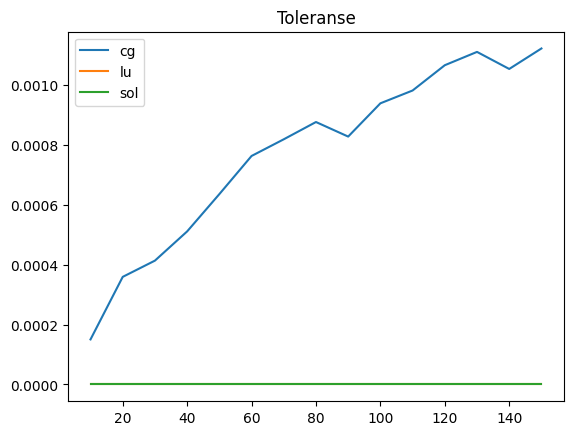

In [4]:
import numpy as np
import matplotlib
import scipy.linalg as lin
import matplotlib.pyplot as plt
import time
from scipy.sparse.linalg import cg
from scipy.linalg import lu
from scipy.linalg import solve_triangular
from math import *



class FDMSteadyFlow2D:
    def __init__(self, Nx, Ny, h_top):
        self.Nx = Nx
        self.Ny = Ny
        self.h_top = h_top
        
    def buildCoeffMatrix(self):
        '''
        Constructs the coefficient matrix A of the final linear
        system of equations of the form Ax = b
        '''
        # Create the diagonal, upper and lower components of B
        Ddiag = -4 * np.eye(self.Nx - 1)
        Dupper = np.diag([1] * (self.Nx - 2), 1)
        Dlower = np.diag([1] * (self.Nx - 2), -1)

        # Add components to create B
        D = Ddiag + Dupper + Dlower

        # Create a block matrix where the diagonals are each B
        Ds = [D] * (self.Nx - 1)
        A = lin.block_diag(*Ds)

        # Create the identity diagonals
        I = np.ones((self.Nx - 1) * (self.Nx - 2))
        Iupper = np.diag(I, self.Nx - 1)
        Ilower = np.diag(I, -self.Nx + 1)

        # Add the identity diagonal to A to complete it
        A += Iupper + Ilower

        return A
    
    def buildRHSVector(self):
        '''
        Constructs the right hand side vector b of the final linear
        system of equations of the form Ax = b
        '''
        b = np.zeros((self.Nx - 1)**2)
        b[-self.Nx+1:] = -self.h_top

        return b

    def solveLinearSystem(self, A, b):
        '''
        Solves the final linear system Ax = b and concatenates the
        boundary conditions (BCs) to the solution
        '''
        # Solve for h vector and reshape array to 2D
        h = lin.solve(A, b)
        errv= np.dot(A,h)-b
        err = sqrt(np.dot(errv,errv))
        h = h.reshape((self.Nx - 1, self.Ny - 1))

        # Create empty 2D array with all nodes and insert BCs ans solution
        h2D = np.zeros((self.Nx + 1, self.Ny + 1))
        h2D[0] = self.h_top         # Insert top BC
        h2D[1:-1, 1:-1] = h[::-1]    # Insert solution (::-1 => inverted)

        return h2D,err
    
    def solveLinearSystemcg(self, A, b):
        '''        Solves the final linear system Ax = b and concatenates the
        boundary conditions (BCs) to the solution
        '''
        # Solve for h vector and reshape array to 2D       
        h,info = cg(A,b)
        errv= np.dot(A,h)-b
        err = sqrt(np.dot(errv,errv))
        #print("Accuracy cg: ",err)
        #print("info: ", info)
        #print(" ")
        h = h.reshape((self.Nx - 1, self.Ny - 1))

        # Create empty 2D array with all nodes and insert BCs ans solution
        h2D = np.zeros((self.Nx + 1, self.Ny + 1))
        h2D[0] = self.h_top         # Insert top BC
        h2D[1:-1, 1:-1] = h[::-1]    # Insert solution (::-1 => inverted)

        return h2D,err
    
    def solveLinearSystemlu(self, A, b):
        '''
        Solves the final linear system Ax = b and concatenates the
        boundary conditions (BCs) to the solution
        '''
        # Solve for h vector and reshape array to 2D
        L,U=lu(A,permute_l=True)
        Y=solve_triangular(L,b,lower=True)
        h=solve_triangular(U,Y)
        errv= np.dot(A,h)-b
        err = sqrt(np.dot(errv,errv))
        #print("Accuracy lu: ",err)
        #print(" ")
        h = h.reshape((self.Nx - 1, self.Ny - 1))

        # Create empty 2D array with all nodes and insert BCs ans solution
        h2D = np.zeros((self.Nx + 1, self.Ny + 1))
        h2D[0] = self.h_top         # Insert top BC
        h2D[1:-1, 1:-1] = h[::-1]    # Insert solution (::-1 => inverted)

        return h2D,err

    
    def plotSolution(self, h2D):
        '''
        Plots the color plot of the solution on a 2D meshgrid
        '''
        # Create 1D arrays with number of nodes
        x = np.linspace(0, 1, self.Nx + 1)
        y = np.linspace(1, 0, self.Ny + 1)

        # Create 2D mesh grid
        X, Y = np.meshgrid(x, y)

        # Plot solution on mesh grid
        matplotlib.rcParams['figure.figsize'] = 6.2, 5
        # plt.clf()
        plt.contourf(X, Y, h2D, 10)
        plt.colorbar()
        plt.xlabel(r'$x$ [$\mathrm{m}$]')
        plt.ylabel(r'$y$ [$\mathrm{m}$]')
        #plt.savefig('2D_Flow_Nx_Ny_' + str(Nx) + '.eps')
        plt.show()
        
if __name__ == "__main__":
  nruns=15
  timesol=np.zeros(nruns)
  tolsol=np.zeros(nruns)
  timelu=np.zeros(nruns)
  tollu=np.zeros(nruns)
  timecg=np.zeros(nruns)
  tolcg=np.zeros(nruns)
  dim=np.zeros(nruns)

  nx=0
  for i in range(0,nruns) :
    nx = nx+10
    print("nx : ", nx)
    fdm = FDMSteadyFlow2D(Nx=nx, Ny=nx, h_top=10)
    A = fdm.buildCoeffMatrix()
    b = fdm.buildRHSVector()
    
    dim[i]   = nx
    
    print("cg...")
    t0=time.perf_counter()
    h,errcg = fdm.solveLinearSystemcg(A, b)
    t = time.perf_counter()-t0
    timecg[i]  = t
    tolcg[i] = errcg
    
    print("gesv...")
    t0=time.perf_counter()
    h,errsol = fdm.solveLinearSystem(A, b)
    t = time.perf_counter()-t0
    timesol[i]  = t
    tolsol[i] = errsol
    
    print("lu...")
    t0=time.perf_counter()
    h,errlu = fdm.solveLinearSystemlu(A, b)
    t = time.perf_counter()-t0
    timelu[i]  = t
    tollu[i]=errlu
    
  #fdm.plotSolution(h)
  fig=plt.figure()
  plt.plot(dim,timecg, label='cg')
  plt.plot(dim,timelu, label='lu')
  plt.plot(dim,timesol,label='sol')
  plt.legend()
  plt.title("Run time")
  plt.show()
  plt.plot(dim,tolcg, label='cg')
  plt.plot(dim,tollu, label='lu')
  plt.plot(dim,tolsol,label='sol')
  plt.legend()
  plt.title("Toleranse")
  plt.savefig("solvers.pdf")
  plt.show()
  




